<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


<font color='blue'>
<strong>Task 1:</strong> Become familiar with the dataset
</font>
<font color='blue'>
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's
</font>

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as scs
import statsmodels.api as sm

<font color='blue'>
<strong>Task 3:</strong> Load in the Dataset in your Jupyter Notebook
</font>

In [14]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url, usecols = ['CRIM', 'ZN', 'INDUS',
                                             'CHAS', 'NOX', 'RM',
                                             'AGE', 'DIS','RAD', 'TAX',
                                             'PTRATIO', 'LSTAT', 'MEDV'])

In [17]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [16]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [20]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


<font color='blue'>
<strong>Task 4:</strong> Generate Descriptive Statistics and Visualizations
</font>

<font color='blue'>
<b>Task 4-1:</b> For the "Median value of owner-occupied homes" provide a boxplot
</font>


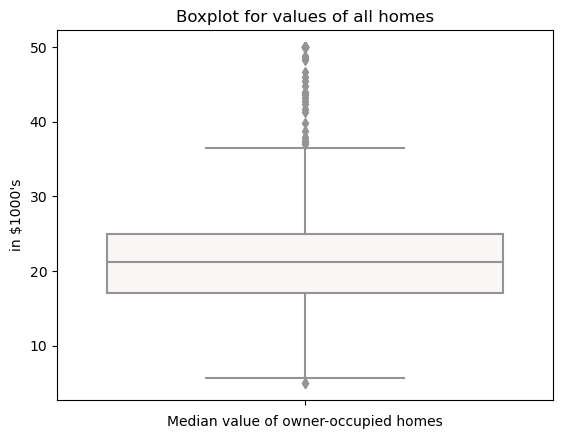

In [75]:
ax = sns.boxplot(y='MEDV', data=boston_df, palette='vlag')
ax.set(ylabel= "in $1000's",
       xlabel= "Median value of owner-occupied homes",
       title="Boxplot for values of all homes")
plt.show()

##### Answer: The boxplot indicates minimum, Q1, median, Q3 , maximum and outliers of MEDV feature

<font color='blue'>
<b>Task 4-2:</b> Provide a  bar plot for the Charles river variable
</font>


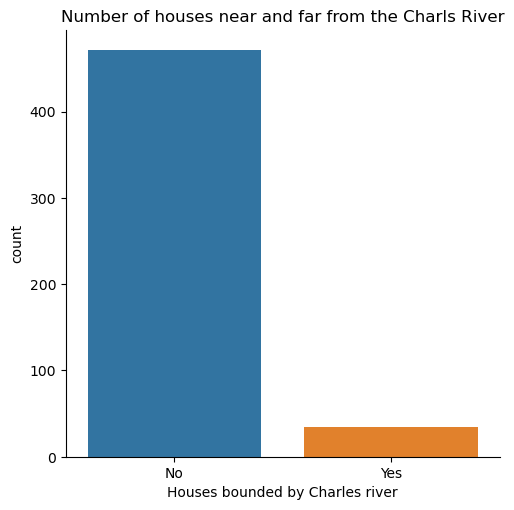

In [76]:
ax = sns.catplot(x='CHAS', kind='count', data=boston_df)
ax.set(xlabel="Houses bounded by Charles river",
       title="Number of houses near and far from the Charls River")
ax.set_xticklabels(['No','Yes'])
plt.show()

##### Answer: According to the plotted distribution, a small number of houses are bounded by a river.

<font color='blue'>
<b>Task 4-3:</b> Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
</font>


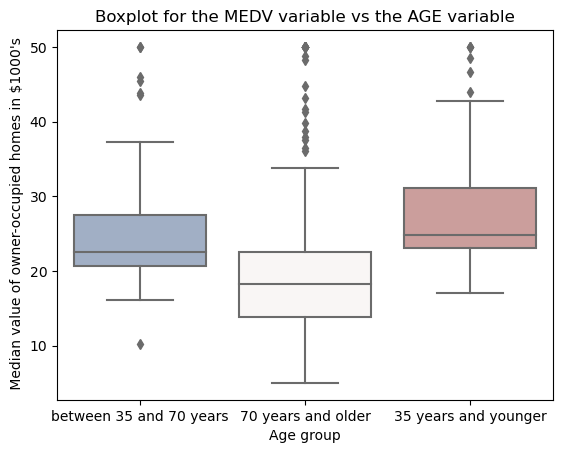

In [77]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df, palette='vlag')
ax.set(ylabel= " Median value of owner-occupied homes in $1000's",
       xlabel = "Age group",
       title="Boxplot for the MEDV variable vs the AGE variable")
plt.show()


<font color='blue'>
<b>Task 4-4:</b> Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
</font>


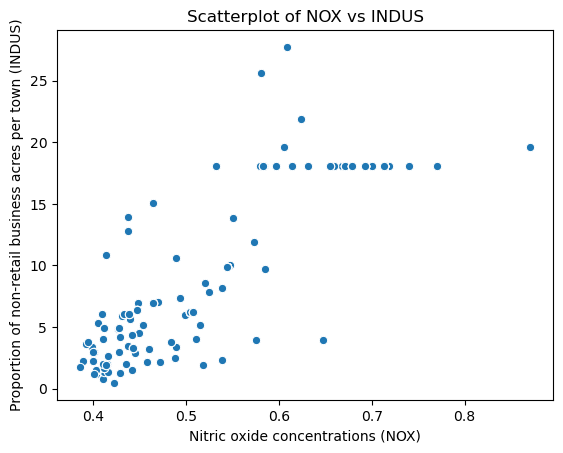

In [78]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set(ylabel= "Proportion of non-retail business acres per town (INDUS)",
       xlabel = "Nitric oxide concentrations (NOX)",
       title="Scatterplot of NOX vs INDUS")
plt.show()


##### Answer: Based on the plot there is relationship between NOX and INDUS, higher NOX associated with higher INDUS.

<font color='blue'>
<b>Task 4-5:</b> Create a histogram for the pupil to teacher ratio variable
</font>


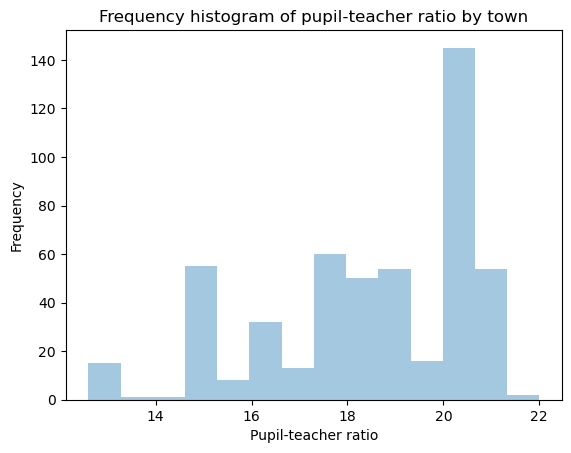

In [79]:
ax = sns.distplot(boston_df.PTRATIO, kde=False)
ax.set(ylabel='Frequency',
       xlabel = "Pupil-teacher ratio",
       title="Frequency histogram of pupil-teacher ratio by town")
plt.show()


##### The histogram plot shows a left-skewed distribution for PTRATIO feature 

<font color='blue'>
<strong>Task 5:</strong> Use the appropriate tests to answer the questions provided.
</font>

<font color='blue'>
<b>Task 5-1:</b> Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
</font>

##### Answer:
##### α = 0.05
##### Null Hypothesis: There is no difference in median value between houses bounded by river and houses not bounded by river 
##### Alternative Hypothesis: There is a difference in median value between houses bounded by river and houses not bounded by river


In [46]:
scs.levene(boston_df[boston_df.CHAS == 1].MEDV,
          boston_df[boston_df.CHAS == 0].MEDV, center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

##### The P-value of Levene's test is less than 0.05, thus, compared groups don't have equal variances. Therefore, equal_var = False for t-test

In [49]:
scs.ttest_ind(boston_df[boston_df.CHAS == 1].MEDV,
          boston_df[boston_df.CHAS == 0].MEDV, equal_var=False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

<div class="alert alert-block alert-success">
<strong>Conclusion:</strong> Obtained P-Value is less than 0.05, Thus, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by river and houses not bounded by river.
</div>

<font color='blue'>
<b>Task 5-2:</b> Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
</font>

##### Answer:
###### First, we group the data into categories as the one-way ANOVA can't work with continuous variable.

In [61]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

##### α = 0.05
##### Null Hypothesis: The three population means are equal
##### Alternative Hypothesis: At least one of the means differs

In [63]:
# Test the equality of variance 
scs.levene(thirtyfive_lower, thirtyfive_seventy, seventy_older, center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

##### The p-value is greater than 0.05, therefore variance for the three groups are statistically equal.

In [64]:
f_statistic, p_value = scs.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print(f"F_Statistic: {f_statistic}, P-Value: {p_value}")

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


<div class="alert alert-block alert-success">
<strong>Conclusion:</strong> Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differs.
</div>

<font color='blue'>
<b>Task 5-3:</b> Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
</font>

##### Answer:
##### α = 0.05
##### Null Hypothesis: Nitric oxide concentrations  is not correlated with proportion of non-retail business acres per town
##### Alternative Hypothesis: Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

In [67]:
f_statistic, p_value = scs.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"F_Statistic: {f_statistic}, P-Value: {p_value}")

F_Statistic: 0.763651446920915, P-Value: 7.913361061239593e-98


<div class="alert alert-block alert-success">
<strong>Conclusion:</strong> The P-value is less 0.05, thus, we reject the Null hypothesis and conclude that there a relationship between NOX and INDUS.
</div>

<font color='blue'>
<b>Task 5-4:</b> What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
</font>


##### Answer:
##### α = 0.05
##### Null Hypothesis: Weighted distances to five Boston employment centres has no effect on Median value of owner-occupied homes
##### Alternative Hypothesis: Weighted distances to five Boston employment centres has effect on Median value of owner-occupied homes


In [74]:
X = boston_df.DIS
y = boston_df.MEDV

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           1.21e-08
Time:                        17:03:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-success">
<strong>Conclusion:</strong> The p-value is less than 0.05, thus, we reject the Null hypothesis and conclude that the DIS has impact on MEDV.
</div>